In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

In [2]:
from scipy import special

In [3]:
iris = load_iris()

In [5]:
X = iris.data

In [6]:
y = iris.target

In [4]:
features = iris.feature_names

In [7]:
features

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [8]:
df = pd.DataFrame(X,columns=features)

In [9]:
df['target'] = y

In [10]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [11]:
df = df.sample(frac=1).reset_index(drop=True)

In [12]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,6.3,2.5,4.9,1.5,1
1,6.9,3.1,4.9,1.5,1
2,6.4,3.2,5.3,2.3,2
3,5.1,3.8,1.9,0.4,0
4,5.2,3.5,1.5,0.2,0


In [25]:
## Using seaborn to check the variation of features as compared to result

In [13]:
import seaborn as sns
sns.set_style('darkgrid')

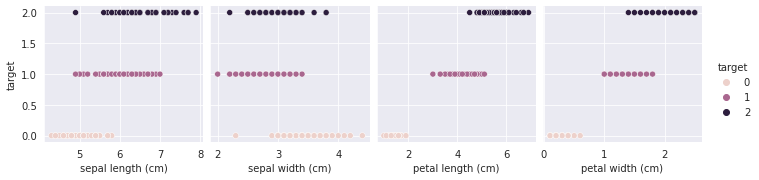

In [14]:
sns.pairplot(df,y_vars = 'target',hue='target')


In [15]:
df.drop(['target'],axis=1).corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.117570,0.871754,0.817941
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126
petal length (cm),0.871754,-0.428440,1.000000,0.962865
petal width (cm),0.817941,-0.366126,0.962865,1.000000


## Selecting only two values of target variable  to make the logestic regression only between 0 and 1

In [16]:
df2 = df[df['target']!=2]

In [17]:
df2.shape

(100, 5)

In [18]:
df2.target.unique()

array([1, 0])

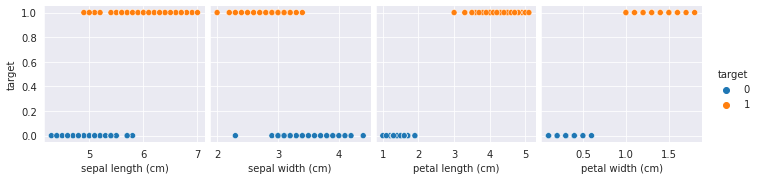

In [62]:
sns.pairplot(df2,y_vars = 'target',hue='target')
plt.show()

In [20]:
X.shape

(150, 4)

In [21]:
y.shape

(150,)

In [31]:
## Creating a function for cacluting the sigmoid 

In [30]:
def sigmoid(z):
    """Returns the sigmoid"""
    s = 1/(1-np.exp(-z))
    return s

In [22]:
def cost_function(X,y,W,b):
    m,n = X.shape
    
    cost = 0
    for i in range(m):
        t = np.dot(X[i],W)+b
        f_wb = sigmoid(t)
       
            
        cost+= -y[i]*(special.log1p(f_wb))-(1-y[i]*(special.log1p(1-f_wb)))
        
    cost = cost/m
    
    return cost
    
        

In [23]:
def gradient_descent(X,y,W,b):
    m,n = X.shape
    dj_dw = np.zeros((n,))
    dj_db = 0
    
    for i in range(m):
        err_i = (np.dot(X[i],W)+b)-y[i]
        for j in range(n):
            dj_dw_i = err_i*X[i,j]
            dj_dw[j]+=dj_dw_i
            
        dj_db+=err_i
        
    dj_dw = dj_dw/m
    dj_db = dj_db/m
    
    return dj_dw,dj_db

In [26]:
def logestic_regression(X,y,W,b,alpha=0.01,iterations=10000):
    m,n = X.shape
    W_i = W
    b_i = b
    cost = np.zeros(iterations+1)
    
    for i in range(iterations+1):
        dj_dw,dj_db = gradient_descent(X,y,W_i,b_i)
        W_i = W_i-alpha*dj_dw
        b_i = b_i-alpha*dj_db
        
        cost[i] = cost_function(X,y,W_i,b_i)
        
    y_pred = np.zeros(m)
    
    for i in range(m):
        p = np.dot(X[i],W_i)+b_i
        
        if p>0.5:
            y_pred[i]=1
        else:
            y_pred[i]=0
            
    return W_i,b_i,cost,y_pred

In [25]:
X = df2.drop(['target'],axis=1).values
y = df2['target'].values
W = np.zeros(4)
b=0.0

In [27]:
from sklearn.model_selection import train_test_split

In [38]:
from sklearn.preprocessing import StandardScaler

In [28]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,stratify=y,random_state=42)

In [53]:
sc = StandardScaler()
X_ntrain = sc.fit_transform(X_train)
X_ntest = sc.transform(X_test)

In [54]:
W_i,b_i,cost,y_pred = logestic_regression(X_ntrain,y_train,W,b,alpha=0.1,iterations=10000)

In [55]:
def predict(X,W,b):
    m = X.shape[0]
    y_hat = np.zeros(m)
    
    for i in range(m):
        p = np.dot(X[i],W)+b
        
        if p>=0.5:
            y_hat[i]=1
        else:
            y_hat[i]=0
        
    return y_hat
    

In [43]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [56]:
y_pred_test = predict(X_ntest,W_i,b_i)

In [57]:
print('Accuracy of model : {:.2f} %'.format(accuracy_score(y_test,y_pred_test)*100))

Accuracy of model : 100.00 %


In [58]:
y_pred_test

array([1., 1., 1., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 1.,
       0., 1., 1.])

In [59]:
y_test

array([1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1])

## Using sklearn logestic regression

In [63]:
from sklearn.linear_model import LogisticRegression

In [64]:
lr = LogisticRegression()
lr.fit(X_ntrain,y_train)

LogisticRegression()

In [65]:
y_pred = lr.predict(X_ntrain)

In [66]:
print('Accuracy of model : {:.2f} %'.format(accuracy_score(y_train,y_pred)*100))

Accuracy of model : 100.00 %


In [67]:
y_pred_test = lr.predict(X_ntest)

In [68]:
print('Accuracy of model : {:.2f} %'.format(accuracy_score(y_test,y_pred_test)*100))

Accuracy of model : 100.00 %


## From both the model we are getting the model accuracy as 100%

## Using tensorflow

In [69]:
import tensorflow as tf

In [70]:
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras import models, Sequential
from tensorflow.keras.optimizers import Adam

In [135]:
model = Sequential()
model.add(Input(shape=(X_ntrain.shape[1],)))
model.add(Dense(1,activation='sigmoid'))

In [124]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 1)                 5         
                                                                 
Total params: 5
Trainable params: 5
Non-trainable params: 0
_________________________________________________________________


In [137]:
optim=Adam(learning_rate=0.001)

In [138]:
model.compile(optimizer=optim,loss=tf.keras.losses.BinaryCrossentropy(from_logits=True))

In [139]:
model.fit(x=X_ntrain,y=y_train,batch_size=1,epochs=100)

Epoch 1/100


/home/abhilash/Coding/genv/lib/python3.8/site-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


80/80 [==============================] - 1s 2ms/step - loss: 0.4378
Epoch 2/100
80/80 [==============================] - 0s 1ms/step - loss: 0.3736
Epoch 3/100
80/80 [==============================] - 0s 1ms/step - loss: 0.3218
Epoch 4/100
80/80 [==============================] - 0s 1ms/step - loss: 0.2798
Epoch 5/100
80/80 [==============================] - 0s 2ms/step - loss: 0.2453
Epoch 6/100
80/80 [==============================] - 0s 2ms/step - loss: 0.2168
Epoch 7/100
80/80 [==============================] - 0s 1ms/step - loss: 0.1928
Epoch 8/100
80/80 [==============================] - 0s 1ms/step - loss: 0.1728
Epoch 9/100
80/80 [==============================] - 0s 2ms/step - loss: 0.1556
Epoch 10/100
80/80 [==============================] - 0s 1ms/step - loss: 0.1408
Epoch 11/100
80/80 [==============================] - 0s 1ms/step - loss: 0.1281
Epoch 12/100
80/80 [==============================] - 0s 2ms/step - loss: 0.1170
Epoch 13/100
80/80 [=============================

In [140]:
def predict_by_tensorflow(X,model):
    pred = np.zeros(X.shape[0])
    p = model.predict(X)
    
    for i in range(p.shape[0]):
        if p[:,0][i]>=0.5:
            pred[i]=1
        else:
            pred[i]=0
            
    return pred

In [141]:
y_pred = predict_by_tensorflow(X_ntrain,model)

In [142]:
print('Accuracy of model : {:.2f} %'.format(accuracy_score(y_train,y_pred)*100))

Accuracy of model : 100.00 %


In [143]:
y_pred_test = predict_by_tensorflow(X_ntest,model)

In [144]:
print('Accuracy of model : {:.2f} %'.format(accuracy_score(y_test,y_pred_test)*100))

Accuracy of model : 100.00 %
